# importing libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [89]:
data = pd.read_csv("diabetes.csv")

In [90]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [92]:
data.shape

(768, 9)

# Access the first row 

In [93]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64


# Check for missing values
 count the number of N/A in data set for each variables

In [94]:
data.isna().sum() 
# Check for the number of zeros in each column
#zero_counts = (data == 0).sum()

# Display results
#print("Number of zero values in each column:")
#print(zero_counts)


#panha, please check here, the file path i change didn't correctly done, therefore when we check it's still the old csv file data?!?


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check datatype of each column

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Descriptive statistics for each column 

In [96]:
# Get summary statistics
summary = data.describe()

# Calculate mode
modes = data.mode().iloc[0]  # Get the first mode for each column

# Display describe() and mode
print("Summary Statistics:\n", summary)
print("\nMode for Each Column:\n", modes)


Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

# Checking for data imbalance

In [97]:
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

### In term as probability (percentage)

In [98]:
data['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### Outcome values Visualizing 

In [99]:
sns.countplot(x='Outcome', data=data, palette = 'pastel')

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_14848\3709795234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

# Variable explorations + identifying shape & outliers

In [100]:
def find_outlier(cols,data):#outlier 
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers_list = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)][cols].unique().tolist()

    # Print results
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers:\n{outliers_list}")
    return outliers_list

In [101]:
def clean_outlier(col,outlier,df,MMM ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df.iloc[ind, df.columns.get_loc(col)] = MMM
    return df

In [102]:
data[data['Pregnancies']==14 ]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [103]:
data[data['Pregnancies']==15 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1


In [104]:
data[data['Pregnancies']==17 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


### Pregnancies

Lower Bound: -6.5
Upper Bound: 13.5
Outliers:
[15, 17, 14]


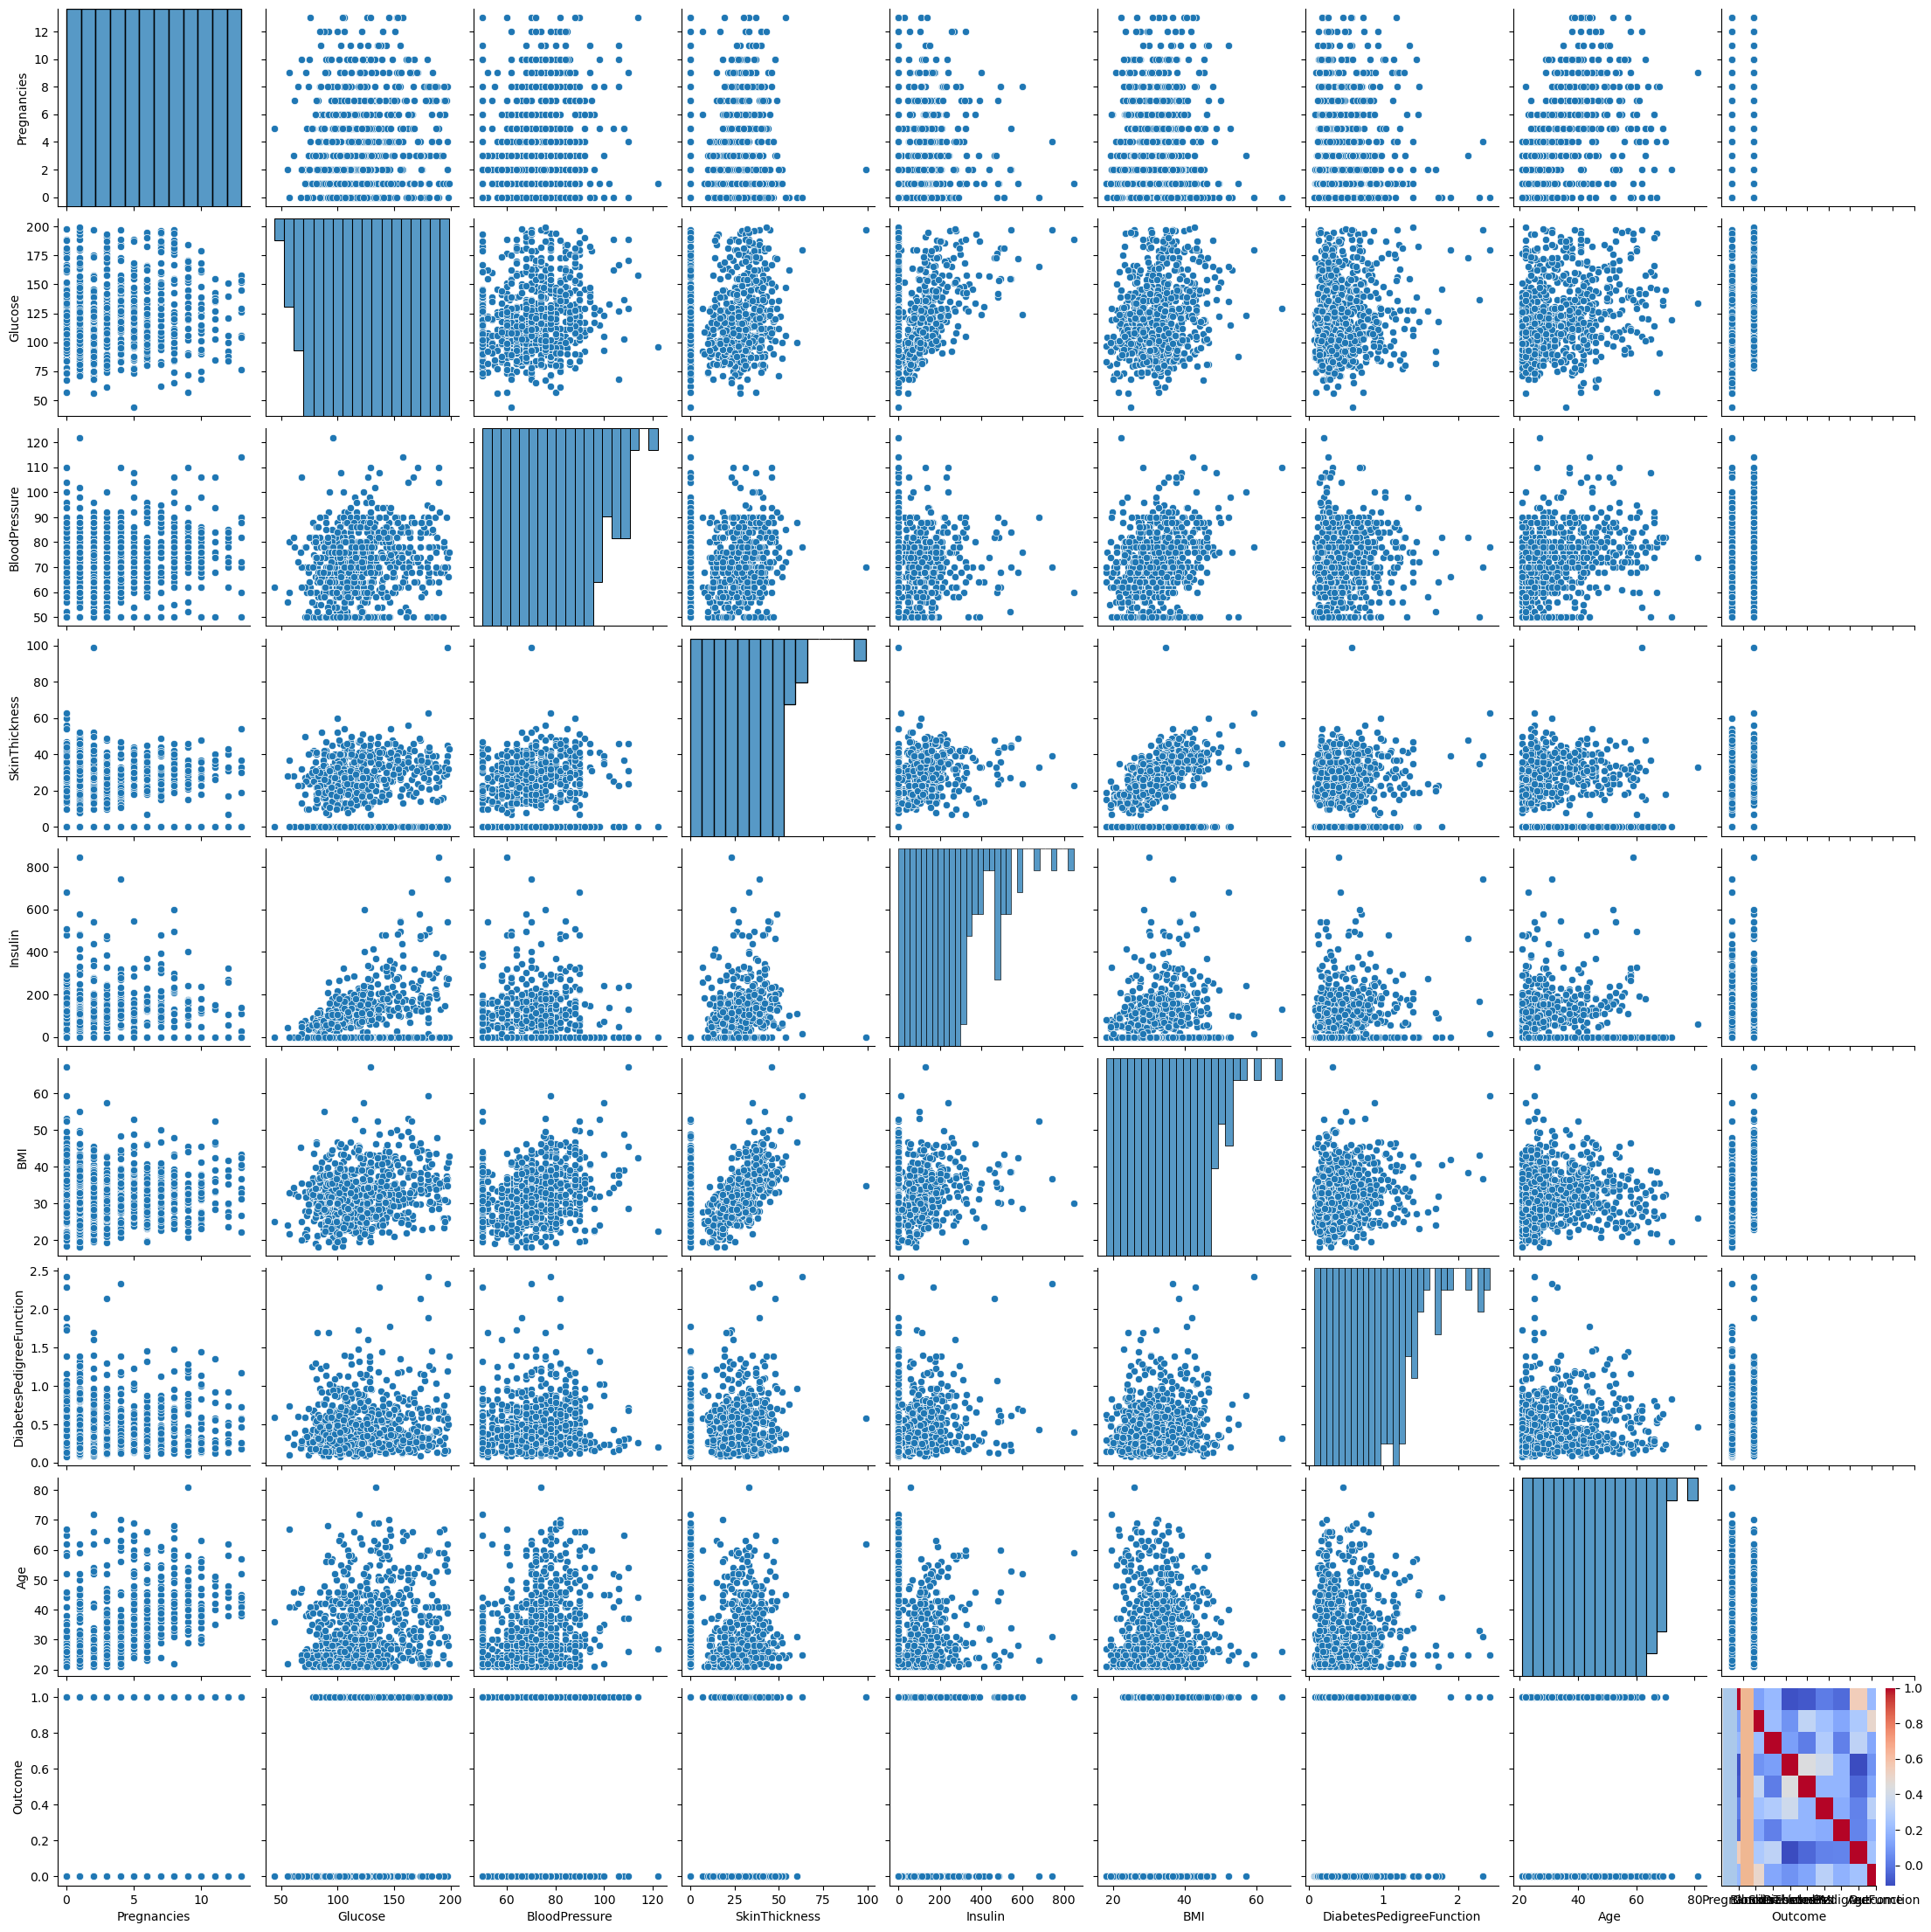

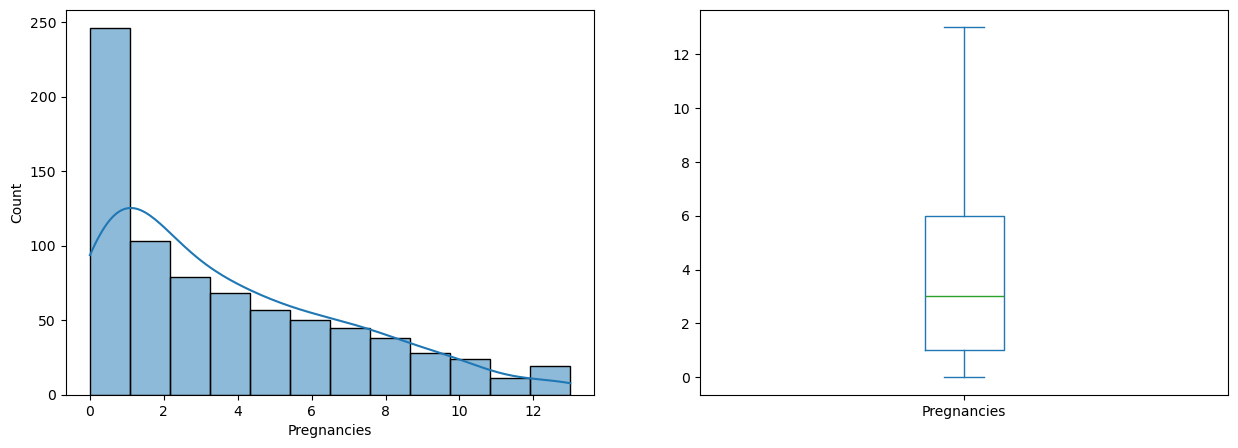

In [105]:
a = find_outlier('Pregnancies', data)
data= clean_outlier('Pregnancies',a , data, 3) #use median = 3
data[data['Pregnancies']== 3]

plt.figure(2)
plt.subplot(121) #histogram
sns.histplot(data['Pregnancies'], kde = True)

plt.subplot(122) #box plot
box_plot = data['Pregnancies'].plot.box(figsize=(15, 5))
plt.show()





Most datas are centered [0,2], and distribution is right-skewed (long tail to the right), meaning that the number of pregnancy occurs less frequency. The outlier is equal or greater than 13. So We use median value to fill in the outlier rows. 

### Glucose

Lower Bound: 37.125
Upper Bound: 202.125
Outliers:
[0]


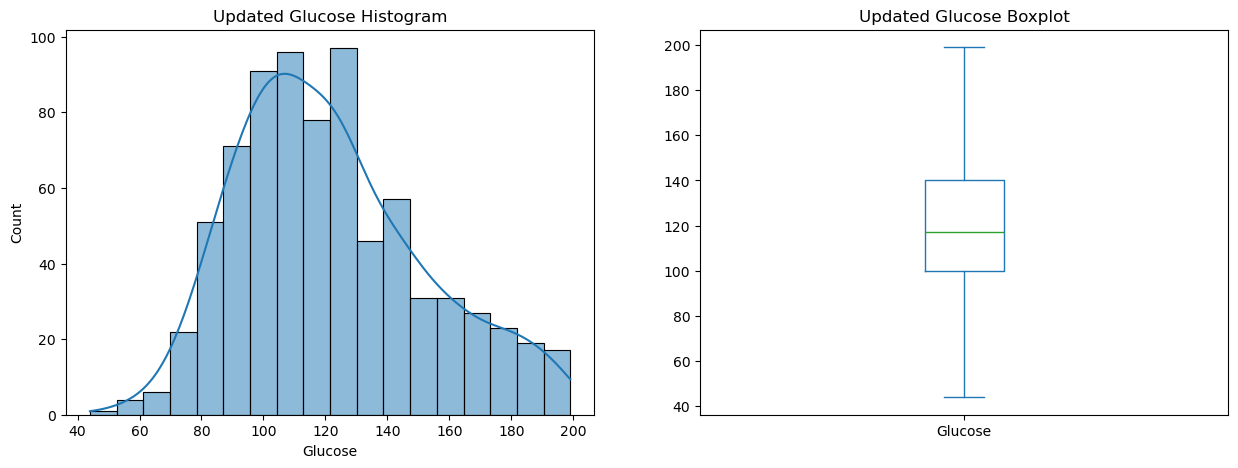

In [106]:
mean_glucose = 121.68

a = find_outlier('Glucose', data)
data = clean_outlier('Glucose', a, data, 122 )
data[data['Glucose']== 0]

# Plot the updated histogram and boxplot
plt.figure(2)
# Histogram
plt.subplot(121)
sns.histplot(data['Glucose'], kde=True)
plt.title('Updated Glucose Histogram')

# Boxplot
plt.subplot(122)
data['Glucose'].plot.box(figsize=(15, 5))
plt.title('Updated Glucose Boxplot')

# Show the plots
plt.show()


Most people have glucose values between 80 and 150.
The data is right-skewed (long tail of high glucose values).
For missing value in this column, we fill it with mean value of Glucose because the distribution isn't skewed. 


### Blood pressure

In [107]:
#a = find_outlier('BloodPressure', data)
#df = data[data['BloodPressure']==0]
# d =df[df['BloodPressure']<70]
#df['Age'].unique()

In [108]:
ind =data.index[data['BloodPressure']<=50].tolist()
for i in ind :
    #ind =data.index[data['BloodPressure']==i].tolist()
    data.at[i, 'BloodPressure'] = 50
#data = clean_outlier('BloodPressure', ind, data, 70)
data[data['BloodPressure']<50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


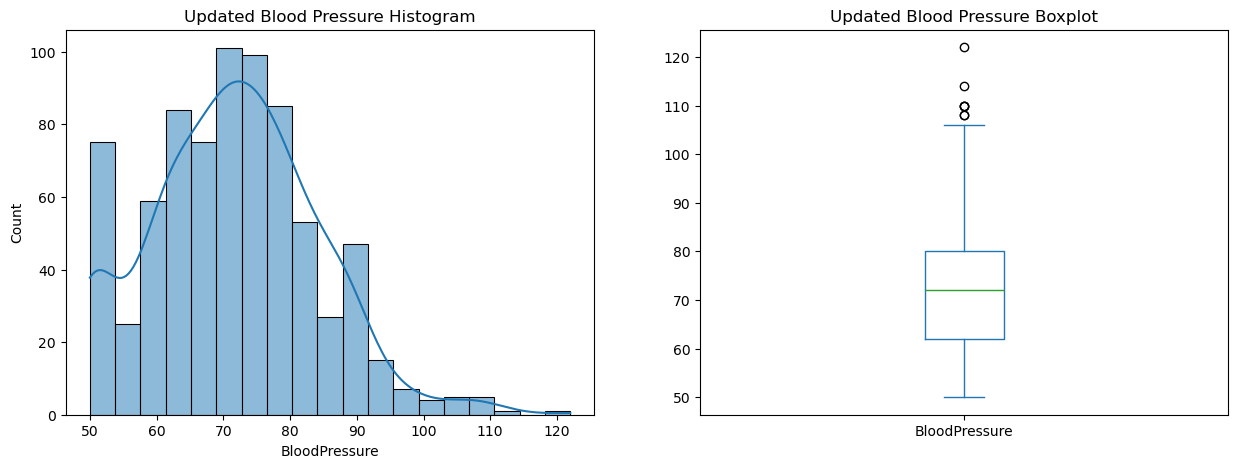

In [109]:
mean_bp = 69.1
median_bp = 72  # Optional: Use this if you prefer median

# Plot the updated histogram and boxplot
plt.figure(2)

# Histogram
plt.subplot(121)
sns.histplot(data['BloodPressure'], kde=True)
plt.title('Updated Blood Pressure Histogram')

# Boxplot
plt.subplot(122)
data['BloodPressure'].plot.box(figsize=(15, 5))
plt.title('Updated Blood Pressure Boxplot')

# Show the plots
plt.show()




Most blood pressure values are concentrated between 60 and 90, which aligns with typical healthy ranges.Outliers above 100 indicate potential cases of elevated or hypertensive blood pressure.The overall distribution is fairly normal, apart from the abnomalies at 0.

In [110]:
data[data['BloodPressure']>=108]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
691,13,158,114,0,0,42.3,0.257,44,1


### Skin thickness


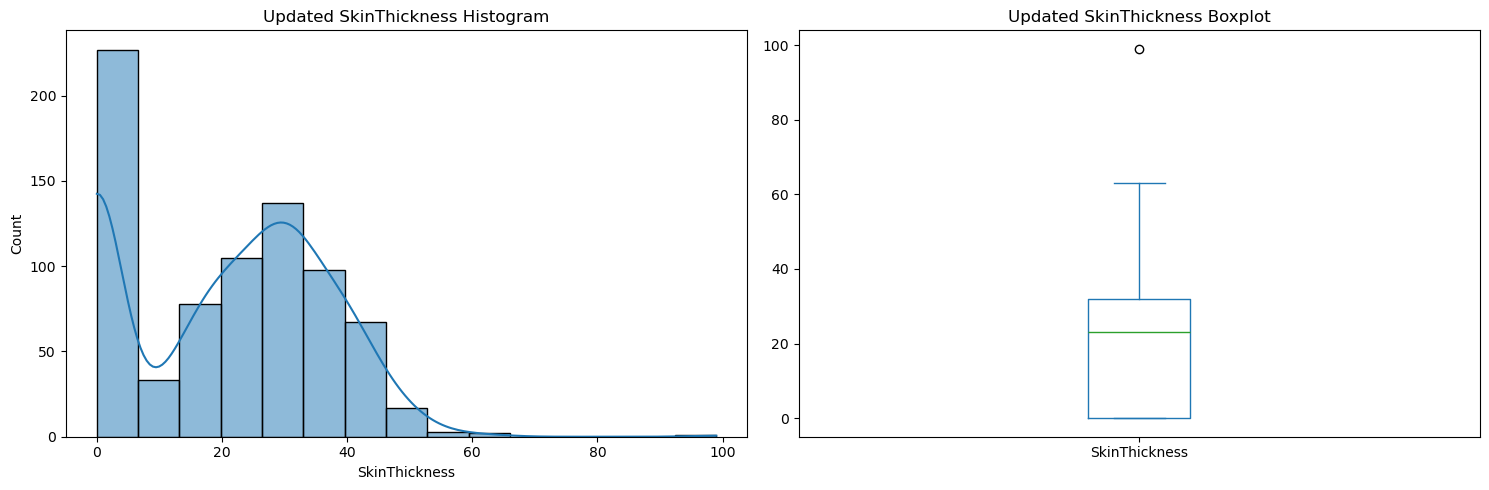

In [111]:

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['SkinThickness'], kde=True)
plt.title('Updated SkinThickness Histogram')

# Boxplot
plt.subplot(122)
data['SkinThickness'].plot.box(figsize=(15, 5))
plt.title('Updated SkinThickness Boxplot')

# Show the plots
plt.tight_layout()
plt.show() 

### Insulin

In [112]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[['Insulin']] = imputer.fit_transform(data[['Insulin']])

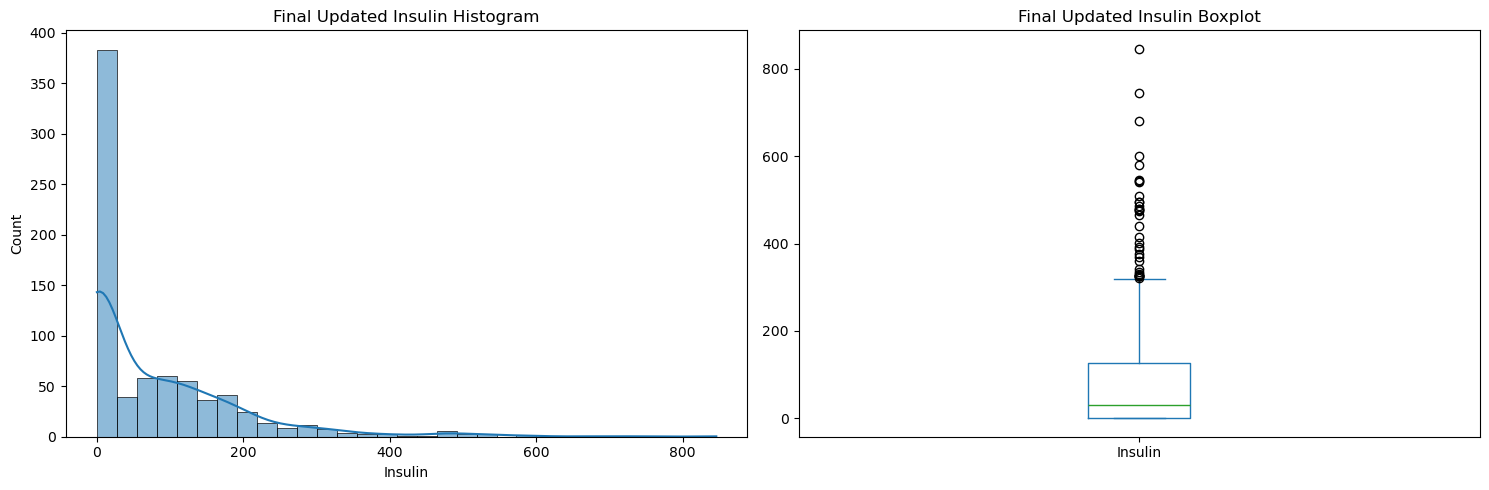

In [113]:
 # Histogram
plt.subplot(121)
sns.histplot(data['Insulin'], kde=True)
plt.title('Final Updated Insulin Histogram')

# Boxplot
plt.subplot(122)
data['Insulin'].plot.box(figsize=(15, 5))
plt.title('Final Updated Insulin Boxplot')

# Show plots
plt.tight_layout()
plt.show()

Most individuals have very low insulin values, but there are some unusually high values (outliers). The data is skewed, with a small group showing much larger insulin levels.

### BMI


In [114]:
a = find_outlier('BMI', data)

Lower Bound: 13.35
Upper Bound: 50.550000000000004
Outliers:
[0.0, 53.2, 55.0, 67.1, 52.3, 52.9, 59.4, 57.3]


In [115]:
a = find_outlier('BMI', data)

# Clean the specific outlier (0) using your clean_outlier function
ind =data.index[data['BMI']==0].tolist()
for i in ind :
    data.at[i, 'BMI'] = 32
    
#verify the cleaning
data[data['BMI']==0]



Lower Bound: 13.35
Upper Bound: 50.550000000000004
Outliers:
[0.0, 53.2, 55.0, 67.1, 52.3, 52.9, 59.4, 57.3]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


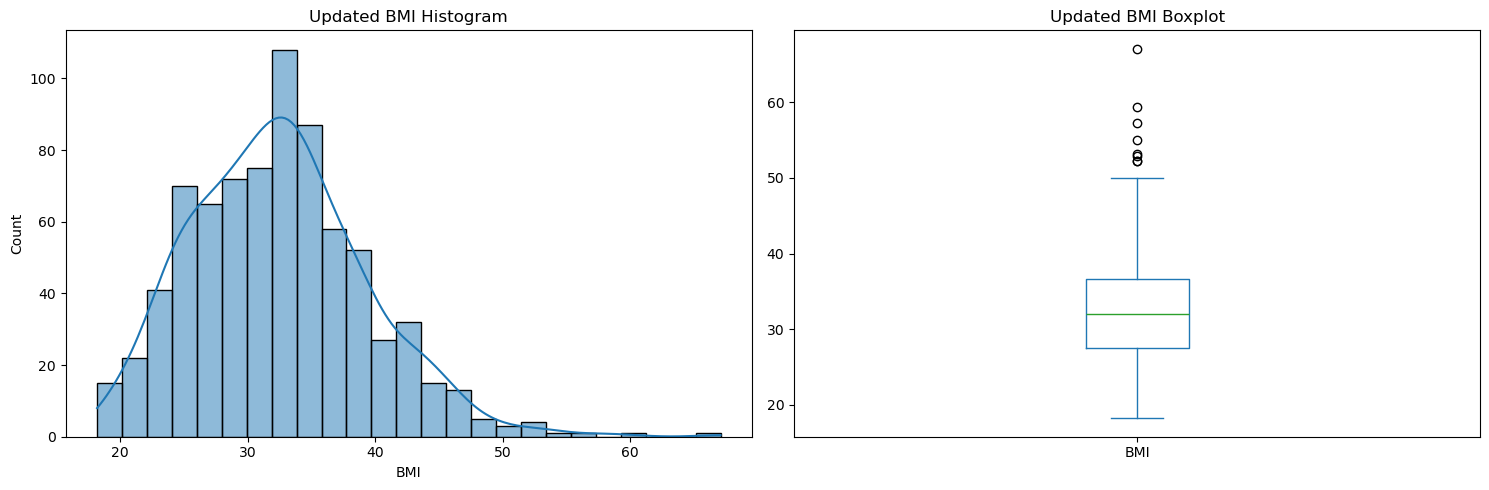

In [116]:
# Define mean and median values
mean_bmi = 31.99
median_bmi = 32

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['BMI'], kde=True)
plt.title('Updated BMI Histogram')

# Boxplot
plt.subplot(122)
data['BMI'].plot.box(figsize=(15, 5))
plt.title('Updated BMI Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

The BMI data has a roughly normal distribution with most values clustered around 30–35. There are a few extreme values (outliers) on both the low and high ends, which slightly skew the data.

### Diabetes Pedigree function
     provides a measure of the likelihood of diabetes based on family history and genetic factors

In [117]:
a = find_outlier('DiabetesPedigreeFunction', data)

Lower Bound: -0.32999999999999996
Upper Bound: 1.2
Outliers:
[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


In [118]:
# a = find_outlier('BMI', data)

# # Clean the specific outlier (0) using your clean_outlier function
# ind =data.index[data['DiabetesPedigreeFunction']== ].tolist()
# for i in ind :
#     data.at[i, 'DiabetesPedigreeFunction'] = ?
    
# #verify the cleaning
# data[data['DiabetesPedigreeFunction']==? ]

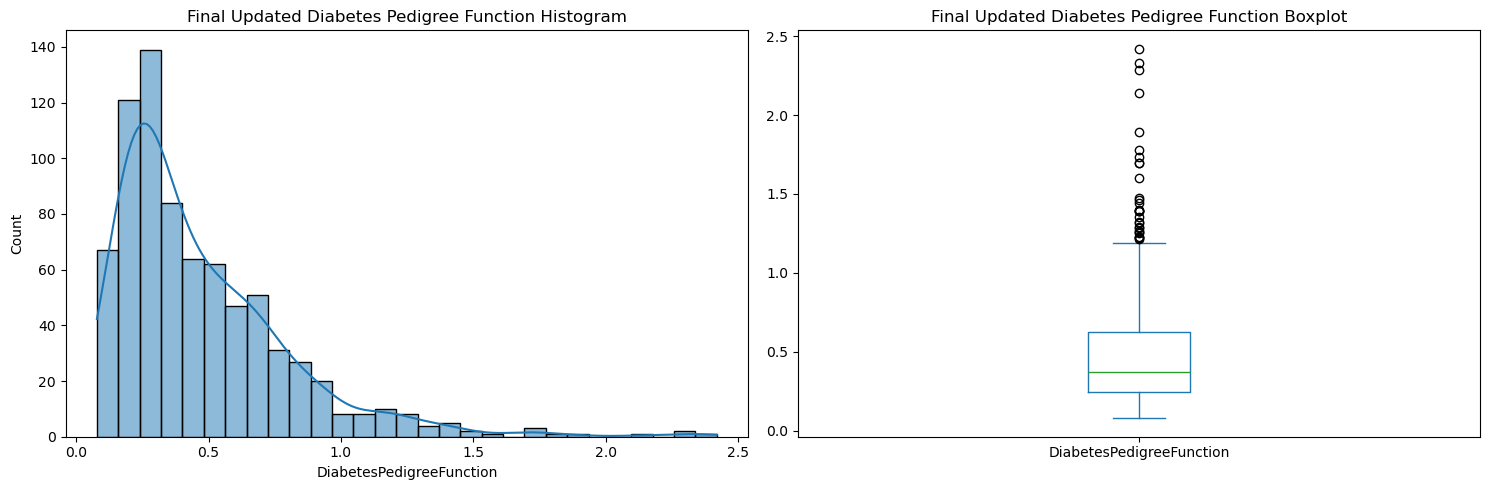

In [119]:
# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['DiabetesPedigreeFunction'], kde=True)
plt.title('Final Updated Diabetes Pedigree Function Histogram')

# Boxplot
plt.subplot(122)
data['DiabetesPedigreeFunction'].plot.box(figsize=(15, 5))
plt.title('Final Updated Diabetes Pedigree Function Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

The DiabetesPedigreeFunction values are mostly small (close to 0), but there are some higher, unusual values (outliers) creating a right-skewed distribution.

### AGE

In [120]:
a = find_outlier('Age', data)

Lower Bound: -1.5
Upper Bound: 66.5
Outliers:
[69, 67, 72, 81, 70, 68]


In [121]:
# ind =data.index[data['Age']>=66.5 ].tolist()
# for i in ind :
#     data.at[i, 'Age'] = 66.5
    
# #verify the cleaning
# data[data['Age']>66.5 ]

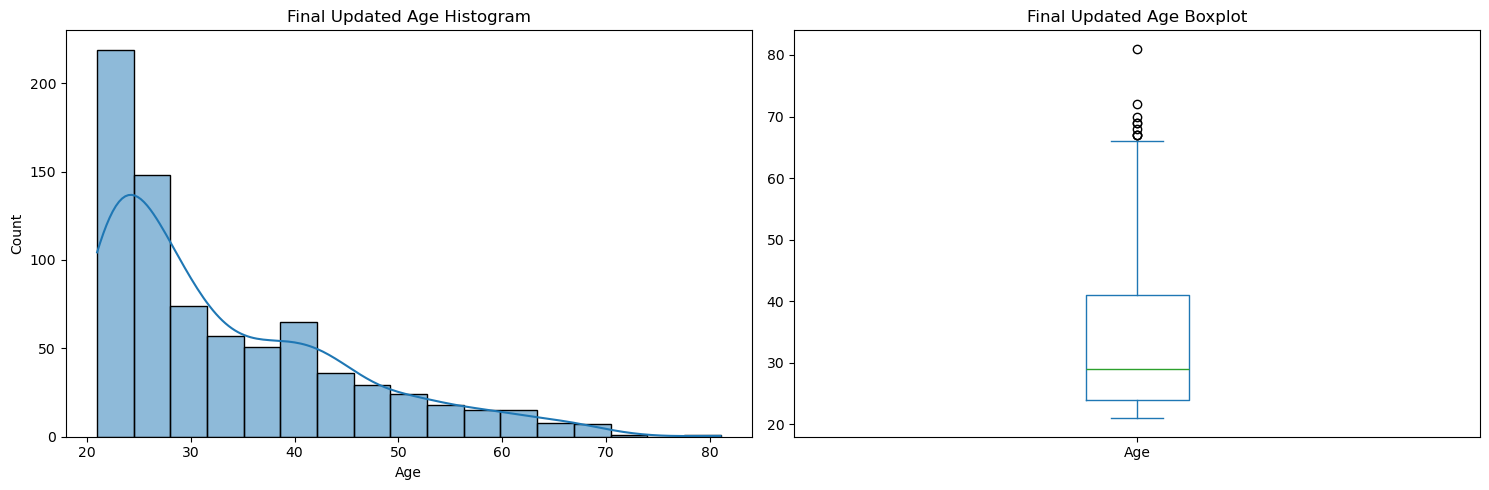

In [122]:
# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['Age'], kde=True)
plt.title('Final Updated Age Histogram')

# Boxplot
plt.subplot(122)
data['Age'].plot.box(figsize=(15, 5))
plt.title('Final Updated Age Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

Most individuals are between 20 and 40 years old. The distribution is right-skewed, with a small number of older individuals (outliers) extending into their 70s and 80s. The median age is approximately 30.

In [124]:
sns.pairplot(data)

# Generate Correlation for each variables


In [125]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117379,0.203445,-0.098567,-0.079597,0.008726,-0.031514,0.543776,0.202492
Glucose,0.117379,1.000000,0.212574,0.075069,0.331036,0.231484,0.137041,0.266507,0.492935
BloodPressure,0.203445,0.212574,1.000000,0.109107,0.012411,0.280680,0.021603,0.321566,0.138283
SkinThickness,-0.098567,0.075069,0.109107,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.079597,0.331036,0.012411,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.008726,0.231484,0.280680,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.031514,0.137041,0.021603,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.543776,0.266507,0.321566,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.202492,0.492935,0.138283,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


In [126]:
corr_matrix = data.corr()

# Visualizing the Correlation

In [127]:
sns.heatmap(corr_matrix, cmap="coolwarm")

<Axes: >

# Check how target variable is different for each column of diabetic and non-diabetic patients

In [128]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.71200,70.280000,19.664000,68.792000,30.880200,0.429734,31.190000
1,4.686567,142.16791,73.929104,22.164179,100.335821,35.381343,0.550500,37.067164


Key Insights:
	•	Glucose, BMI, and Insulin are significantly higher in diabetic patients, suggesting these factors play an important role in diabetes.
	•	Age and Pregnancies are also higher for diabetic patients.
	•	Overall, diabetic patients have higher values across most features compared to non-diabetic patients.

### Creating X & Y variables for graph

In [129]:
X = data.drop(columns = 'Outcome', axis = 1)
Y = data['Outcome']

# Splitting data into 70%-30% for training and testing model    ---test

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Running Classification models

### 1. Logistic Regression 

efhsdhfdsk
